### Calculate Error Metrics for Price Predictions

After the simulation loop, calculate error metrics between the predicted and actual prices.


In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv("AAPL-llama3.2:3b-LOW-1729632420.csv")
df = pd.read_csv("AAPL-llama3.2:3b-LOW-1729635457.csv")
df.head()

,date,price,action,volume,value,holdings,funds,reason,predicted_price,actual_next_open_price
0,2018-01-02,42.54,SELL,50,5254.00,50,3127.00,Given the LOW portfolio risk tolerance and the...,43.13,46.88
1,2018-01-03,43.13,SELL,2,5283.63,48,3213.27,Given the cautious market tone and the recent ...,43.13,39.60
2,2018-01-04,43.13,SELL,20,5283.74,28,4075.97,Given the recent security flaws in Intel chips...,43.36,39.17
3,2018-01-05,43.36,SELL,50,5290.05,0,5290.05,Given the potential risks posed by the Meltdow...,43.59,39.86
4,2018-01-08,43.59,BUY,1,5290.05,1,5246.46,Despite the concerns about phone addiction and...,43.64,43.27


In [3]:
# Ensure that predicted and actual prices are numeric
df["predicted_price"] = pd.to_numeric(df["predicted_price"], errors="coerce")
df["actual_next_open_price"] = pd.to_numeric(
    df["actual_next_open_price"], errors="coerce"
)

In [4]:
# Drop rows with NaN values in these columns
df_clean = df.dropna(subset=["predicted_price", "actual_next_open_price"])

df.shape, df_clean.shape

((251, 10), (251, 10))

In [5]:
mae = mean_absolute_error(
    df_clean["actual_next_open_price"], df_clean["predicted_price"]
)
mse = mean_squared_error(
    df_clean["actual_next_open_price"], df_clean["predicted_price"]
)
rmse = np.sqrt(mse)
mape = (
    np.mean(
        np.abs(
            (df_clean["actual_next_open_price"] - df_clean["predicted_price"])
            / df_clean["actual_next_open_price"]
        )
    )
    * 100
)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Error: 2.31199203187251
Mean Squared Error: 7.417167729083667
Root Mean Squared Error: 2.723447765073468
Mean Absolute Percentage Error: 4.918454808732973


### 3. Evaluate the Trading Strategy Performance

Compare your portfolio's performance to a benchmark portfolio (e.g., one that buys and holds the stock throughout the period).

In [6]:
# Calculate daily returns for your portfolio
df["portfolio_return"] = df["value"].pct_change()

# Create a benchmark portfolio (buy and hold)
funds, holdings = 1000, 100
initial_investment = funds + holdings * df.iloc[0]["price"]
df["benchmark_value"] = initial_investment * (df["price"] / df.iloc[0]["price"])
df["benchmark_return"] = df["benchmark_value"].pct_change()

# Calculate cumulative returns
df["portfolio_cum_return"] = (1 + df["portfolio_return"].fillna(0)).cumprod() - 1
df["benchmark_cum_return"] = (1 + df["benchmark_return"].fillna(0)).cumprod() - 1

df.head()

,date,price,action,volume,value,holdings,funds,reason,predicted_price,actual_next_open_price,portfolio_return,benchmark_value,benchmark_return,portfolio_cum_return,benchmark_cum_return
0,2018-01-02,42.54,SELL,50,5254.00,50,3127.00,Given the LOW portfolio risk tolerance and the...,43.13,46.88,NaN,5254.000000,NaN,0.000000,0.000000
1,2018-01-03,43.13,SELL,2,5283.63,48,3213.27,Given the cautious market tone and the recent ...,43.13,39.60,0.005640,5326.869299,0.013869,0.005640,0.013869
2,2018-01-04,43.13,SELL,20,5283.74,28,4075.97,Given the recent security flaws in Intel chips...,43.36,39.17,0.000021,5326.869299,0.000000,0.005660,0.013869
3,2018-01-05,43.36,SELL,50,5290.05,0,5290.05,Given the potential risks posed by the Meltdow...,43.59,39.86,0.001194,5355.275976,0.005333,0.006861,0.019276
4,2018-01-08,43.59,BUY,1,5290.05,1,5246.46,Despite the concerns about phone addiction and...,43.64,43.27,0.000000,5383.682652,0.005304,0.006861,0.024683


In [7]:
# Total returns
total_portfolio_return = df["portfolio_cum_return"].iloc[-1]
total_benchmark_return = df["benchmark_cum_return"].iloc[-1]

In [8]:
# Annualized returns
num_years = (
    pd.to_datetime(df["date"].iloc[-1]) - pd.to_datetime(df["date"].iloc[0])
).days / 365.25
annualized_portfolio_return = (1 + total_portfolio_return) ** (1 / num_years) - 1
annualized_benchmark_return = (1 + total_benchmark_return) ** (1 / num_years) - 1

# Volatility (Standard Deviation of returns)
portfolio_volatility = df["portfolio_return"].std() * np.sqrt(252)
benchmark_volatility = df["benchmark_return"].std() * np.sqrt(252)

# Sharpe Ratio (Assuming risk-free rate is zero)
portfolio_sharpe = (
    df["portfolio_return"].mean() / df["portfolio_return"].std()
) * np.sqrt(252)
benchmark_sharpe = (
    df["benchmark_return"].mean() / df["benchmark_return"].std()
) * np.sqrt(252)

In [9]:
# Print the results
print(f"Total Portfolio Return: {total_portfolio_return:.2f}")
print(f"Total Benchmark Return: {total_benchmark_return:.2f}")
print(f"Annualized Portfolio Return: {annualized_portfolio_return:.2f}")
print(f"Annualized Benchmark Return: {annualized_benchmark_return:.2f}")
print(f"Portfolio Volatility: {portfolio_volatility:.2f}")
print(f"Benchmark Volatility: {benchmark_volatility:.2f}")
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe:.2f}")
print(f"Benchmark Sharpe Ratio: {benchmark_sharpe:.2f}")

Total Portfolio Return: 0.18
Total Benchmark Return: -0.07
Annualized Portfolio Return: 0.18
Annualized Benchmark Return: -0.07
Portfolio Volatility: 0.23
Benchmark Volatility: 0.29
Portfolio Sharpe Ratio: 0.83
Benchmark Sharpe Ratio: -0.10


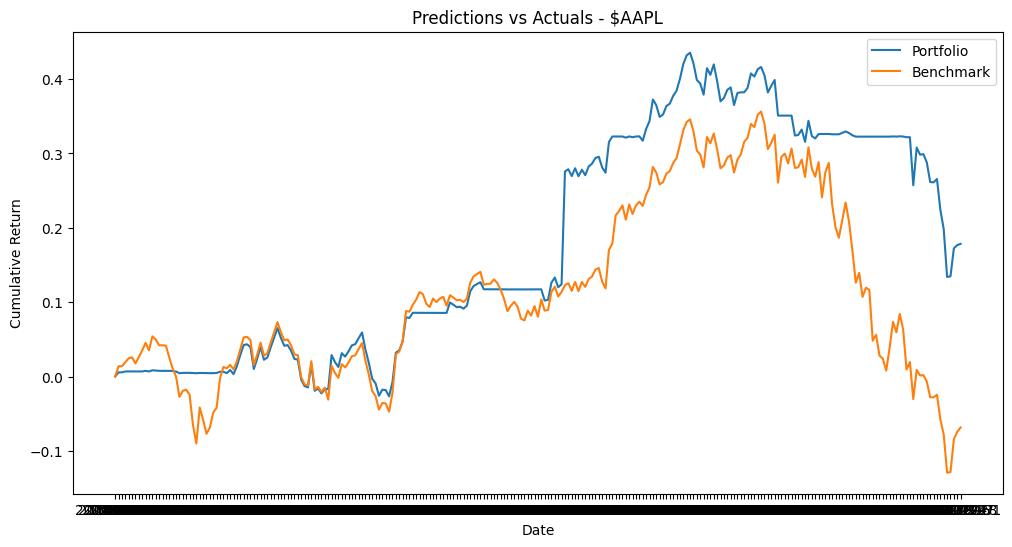

In [13]:
# Plot the portfolio and benchmark returns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["portfolio_cum_return"], label="Portfolio")
plt.plot(df["date"], df["benchmark_cum_return"], label="Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Predictions vs Actuals - $AAPL")
plt.legend()
plt.show()


### 5. Additional Considerations

Calculate the maximum drawdown to assess the risk of your trading strategy.


In [11]:
 # Calculate running maximum
df['running_max'] = df['value'].cummax()
df['drawdown'] = (df['value'] - df['running_max']) / df['running_max']
max_drawdown = df['drawdown'].min()
print(f"Max Drawdown: {max_drawdown:.2f}")

Max Drawdown: -0.21
